In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
from sklearn.datasets import make_circles 
from sklearn.svm import SVC

### Data preparation

noise 를 포함하여 데이터를 만들어보기: Scikit learn의 make_circles 함수를 이용

In [2]:
noise = 0.08 #바꾸어보세요

In [3]:
X, Y = make_circles(n_samples = 1000, noise = noise)

In [4]:
X.shape

(1000, 2)

In [5]:
Y.shape

(1000,)

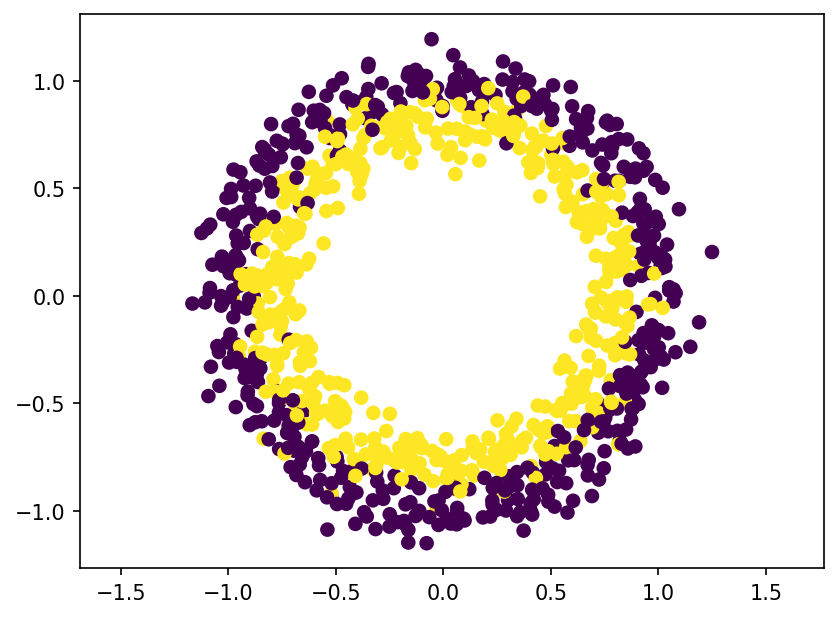

In [6]:
plt.figure(dpi=150)
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.axis('equal')
plt.show()

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2) #보통 0.2 또는 0.3을 합니다.

In [9]:
X_train.shape

(800, 2)

In [10]:
X_test.shape

(200, 2)

In [11]:
y_test.shape

(200,)

### Defining a SVM model

In [12]:
model1 = SVC(kernel = 'rbf', C=1)

In [13]:
%%time
model1.fit(X_train, y_train) #Train 데이터 만을 이용합니다.

CPU times: user 12.5 ms, sys: 325 µs, total: 12.8 ms
Wall time: 12.2 ms


SVC(C=1)

In [14]:
model1.score(X_test, y_test)

0.885

In [15]:
def PlotSVM(X, y, model, title="SVM", xmin=-2, xmax=2, ymin=-2, ymax=2):
    import matplotlib as mpl
    XX, YY = np.meshgrid(np.arange(xmin, xmax, (xmax-xmin)/1000),
                         np.arange(ymin, ymax, (ymax-ymin)/1000))
    Z = model.predict(np.array([XX.ravel(), YY.ravel()]).T)
    ZZ = np.reshape(Z, XX.shape)
    fig = plt.figure(figsize=(7,7))
    plt.contourf(XX, YY, ZZ, cmap=mpl.cm.Paired_r, alpha=0.5)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    plt.title(title)
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.show()

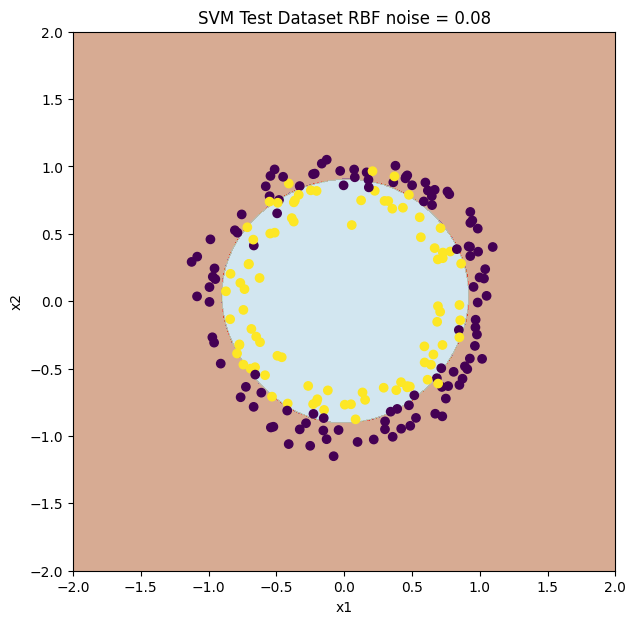

In [16]:
PlotSVM(X_test, y_test, model1, title='SVM Test Dataset RBF noise = {}'.format(noise))

### Prediction & Evaluation

In [17]:
predictions = model1.predict(X_test)

In [18]:
predictions #예측 결과

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1])

In [19]:
y_test # 정답 (사전에 잘라 두었던 20%)

array([1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0])

In [20]:
y_test == predictions

array([ True,  True,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [21]:
np.sum(y_test == predictions) # True = 1, False = 0 이므로, 다 더하면 True의 갯수를 구할수 있게 됨

177

In [22]:
len(y_test) # 전체 데이터 갯수

200

In [23]:
np.sum(y_test == predictions) / len(y_test)

0.885

또는 아래처럼 간단히 정확도를 구함

In [24]:
model1.score(X_test, y_test)

0.885